<a href="https://colab.research.google.com/github/AnvayRaj/MLP-Notes/blob/main/Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

## How to build baseline regression model?

`DummyRegressor` helps in creating a baseline for regression.

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy='mean')
dummy_regr.fit(X_train, y_train)
dummy_regr.predict(X_test)
dummy_regr.score(X_test, y_test)

-0.00021908714592466794

* It makes a prediction as specified by the strategy.
* Strategy is based on some statistical property of the training set or user specified value.
* Strategy can be from (`'mean'`, `'median'`, `'quantile'`, `'constant'`)

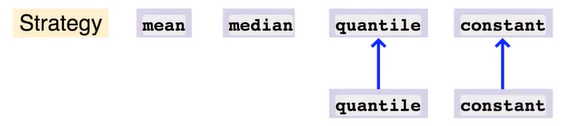

## How is Linear Regression model trained?

* Step 1: Instantiate object of a suitable linear regression estimator from one of the following two options.

In [3]:
# Normal Equation

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()

In [4]:
# Iterative Optimization

from sklearn.linear_model import SGDRegressor
linear_regressor = SGDRegressor()

* Step 2: Call fit method on linear regression object with training feature matrix and label vector as arguments.

In [5]:
# Model training with feature matrix X_train and label vector or matrix as y_train
linear_regressor.fit(X_train, y_train)

SGDRegressor()

Works for both single and multi-output regression

## SGDRegressor Estimator

* Implements stochastic gradient descent
* Use for large training setup (>10k samples)
* Provides greater control on optimization process through provision for hyperparameter settings.


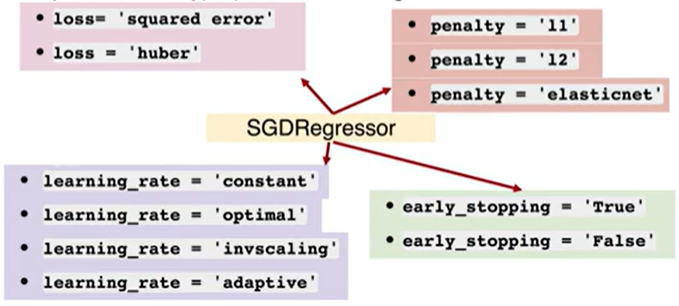

It's a good idea to use a random seed of your choice while instantiating SGDRegressor object. It helps us to get reproducible results.

Set `random_state` to seed of your choice.

In [6]:
from sklearn.linear_model import SGDRegressor

linear_regressor = SGDRegressor(random_state=42)

**Note**: In the rest of the code, we won't set the random seed for sake of brevity. However while coding, always set the random seed in the constructor.

### How to perform feature scaling for SGDRegressor?

SGD is sensitive to feature scaling, so it is highly recommended to scale input feature matrix.

In [7]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

sgd = Pipeline([
    ('feature_scaling', StandardScaler()),
    ('sgd_regressor', SGDRegressor())
])
sgd.fit(X_train, y_train)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('sgd_regressor', SGDRegressor())])

**Note**:
* Feature scaling is not needed for word frequencies and indicator features as they have intrinsic scale.
* Features extracted using PCA should be scaled by some constant _c_ such that the average L2 norm of the training data equals one.

### How to shuffel data after each epoch in SGDRegressor?

In [8]:
from sklearn.linear_model import SGDRegressor
linear_regressor = SGDRegressor(shuffle=True)

### How to set learning rate in SGDRegressor?

* `learning_rate = 'constant'`
* `learning_rate = 'invscaling'`
* `learning_rate = 'adaptive'`
* What is the default setting?
  * `learning_rate = 'invscaling'`
  * `eta0 = 1e-2`
  * `power_t = 0.25`

learning rate reduces after every iteration:
  * `eta = eta0 / pow(t, power_t)`

**Note**: You can make changes to these parameters to speed up or slow down the training process.

#### How to use set constant learning rate?
  * `learning_rate = 'constan'`

In [9]:
from sklearn.linear_model import SGDRegressor
linear_regressor = SGDRegressor(learning_rate='constant', eta0=1e-2)

* constant learning rate `eta0 = 1e-2` is used throughout the training.

#### How to set adaptive learning rate?


In [10]:
from sklearn.linear_model import SGDRegressor
linear_regressor = SGDRegressor(learning_rate='adaptive', eta0=1e-2)

* The learning rate is kept to initial value as long as the training loss decreases.
* When the stopping criterion is reached, the learning rate is divided by 5, and the training loop continues.
* The algorithm stops when the learning rate goes below 10<sup>-6</sup>.

### How to set #epochs in SGDRegressor?

set `max_iter` to desired #epochs. The default value is 1000.

In [11]:
from sklearn.linear_model import SGDRegressor
linear_regressor = SGDRegressor(max_iter=100)

Remember one epoch is one full pass over the training data.

**Practical Tip**
* SGD converges after observing approximately 10<sup>6</sup> training samples. Thus, a reasonable first guess for the number of iterations for n sampled training set is `max_iter = np.ceil(1e6/n)`.

### How to set stopping criteria in SGDRegressor?

* **Option #1:** `tol`, `n_iter_no_change`, `max_iter`.

In [12]:
from sklearn.linear_model import SGDRegressor
linear_regressor = SGDRegressor(loss='squared_error',
                                max_iter=500,
                                tol=1e-3,
                                n_iter_no_change=5)

The SGDRegressor stops
>* when training loss does not improve (loss > best_loss - `tol`) for `n_iter_no_change` consecutive epochs
* else after a maximum number of iteration `max_iter`.

* **Option #2:** `early_stopping`, `validation_fraction`

In [13]:
from sklearn.linear_model import SGDRegressor
linear_regressor = SGDRegressor(loss='squared_error',
                                early_stopping=True,
                                max_iter=500,
                                tol=1e-3,
                                validation_fraction=0.2,
                                n_iter_no_change=5)

Set aside `validation_fraction` percentage records from training set as validation set. Use score method to obtain validation score.

The SGDRegressor stops when
>* validation_score does not improve by atleast `tol` for `n_iter_no_change` consecutive epochs.
* else after a maximum number of iteration `max_iter`.

### How to use different loss function in SGDRegressor?

Set `loss` parameter to one of the supported values
* `'squared_error'`
* `'huber`

In [14]:
from sklearn.linear_model import SGDRegressor
linear_regressor = SGDRegressor(loss='squared_error')

It also supports other losses as documented in [sklearn API](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html?highlight=sgdregressor#sklearn.linear_model.SGDRegressor)

### How to use averaged SGD?

Averaged SGD updates the weight vector to average of weights from previous updates.

Option #1: Averaging across all updates `average=True`

In [15]:
from sklearn.linear_model import SGDRegressor
linear_regressor = SGDRegressor(average=True)

Option #2: Set `average` to int value.

Averaging begins once the total number of samples seen reaches `average`

setting `average=10` starts averaging after seeing 10 samples


In [16]:
from sklearn.linear_model import SGDRegressor
linear_regressor = SGDRegressor(average=10)

Averaged SGD works best with a large number of features and a higher eta0

### How do we initailize SGD with weight vector of the previous run?

Set `warm_start=True` while instantiating object of SGDRegressor

In [17]:
from sklearn.linear_model import SGDRegressor
linear_regressor = SGDRegressor(warm_start=True)

By default `warm_start=False`

### How to monitor SGD loss iteration after iteration?

Make use of warm_start=True

In [18]:
from sklearn.metrics import mean_squared_error
import numpy as np

sgd_reg = SGDRegressor(max_iter=1000,
                       tol=0,
                       warm_start=True,
                       penalty=None,
                       learning_rate='constant',
                       eta0=0.0005)

for epoch in range(1000):
  sgd_reg.fit(X_train, y_train) # continues where it left off
  y_val_predict = sgd_reg.predict(X_test)
  val_error = mean_squared_error(y_test, y_val_predict)

# Model Inspection

## How to access the weights of trained Linear Regression model?

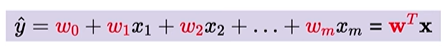

The weights w<sub>1</sub>, w<sub>2</sub>, ... , w<sub>m</sub> are stored in coef_ class variable.

In [19]:
sgd_reg.coef_

array([-2.22359990e+11, -1.71420632e+11, -2.37015048e+11,  3.96728060e+10,
       -2.72207987e+11, -1.72610815e+12, -8.42613417e+10, -1.17185496e+12])

The intercept w<sub>0</sub> is stored in intercept_ class variable.

In [20]:
sgd_reg.intercept_

array([-2.62724386e+10])

**Note**: These code snippets work for both LinearRegression and SGDRegressor, and for that matter to all regression estimators that we will study in this module. Why? (Ans: All of them are estimators)

# Model Inference

In [21]:
linear_regressor.fit(X_train, y_train)

SGDRegressor(warm_start=True)

## How to make predictions on new data in Linear Regression model?

* Step 1: Arrange data for prediction in a feature matrix of shape (#samples, #features) or in sparse matrix format.
* Step 2: Call predict method on linear regression object with feature matrix as an argument.

In [22]:
# Predict label for feature matrix X_test
linear_regressor.predict(X_test)

array([-8.14928610e+13, -9.58530196e+13, -8.11970443e+13, ...,
       -9.82864927e+13, -7.23348773e+13, -1.01456582e+14])

Same code works for all regression estimators.

# Model Evaluation

## General Steps in model evaluation

* **Step 1**: Split data into train and test

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

* **Step 2**: Fit linear regression estimator on training set.
* **Step 3**: Calculate training error (a.k.a. empirical error).
* **Step 4**: Caltulate test error (a.k.a. generalization error).
* Compare Training and Test errors

### How to evaluate trained Linear Regression model?

Using **score** method on linear regression object:

In [24]:
# Evaluation on the eval set with
# 1. feature matrix
# 2. label vector or matrix (single/multi-output)
linear_regressor.score(X_test, y_test)

-1.0194227148848151e+28

The score returns R<sup>2</sup> or coefficient of determination

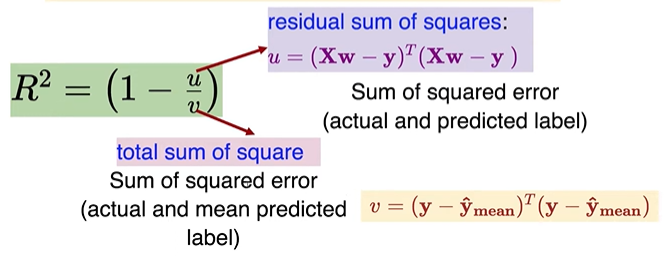

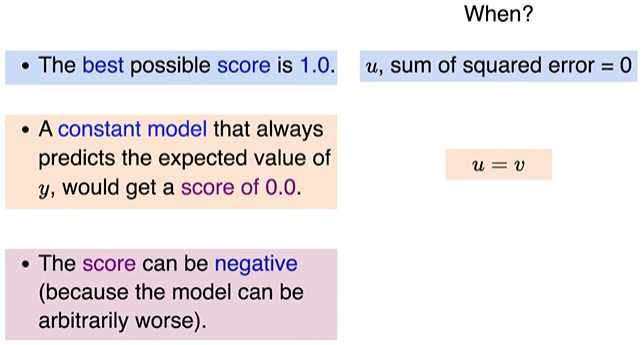

## Evaluation metrics

Sklearn provides a bunch of regression metrics to evaluate performance of the trained estimator on the evaluation set.

* `mean_absolute_error`

In [29]:
from sklearn.metrics import mean_absolute_error

y_pred = linear_regressor.predict(X_test)
eval_score = mean_absolute_error(y_test, y_pred)
eval_score

85761607559031.5

* `mean_squared_error`

In [31]:
from sklearn.metrics import mean_squared_error

eval_score = mean_squared_error(y_test, y_pred)
eval_score

1.3489185928952698e+28

* `r2_score` - same as score

In [32]:
from sklearn.metrics import r2_score

eval_score = r2_score(y_test, y_pred)
eval_score

-1.0194227148848151e+28

These metrics can also be used in multi-output regression setup.

* `mean_squared_log_error`
  * Useful for targets with exponential growths like population, sales growth etc,
  * Penalizes under-estimation heavier than the over-estimation.

In [34]:
# from sklearn.metrics import mean_squared_log_error

# eval_score = mean_squared_log_error(y_test, y_pred)
# eval_score

* `mean_absolute_percentage_error`
  * sensitive to relative error

In [35]:
from sklearn.metrics import mean_absolute_percentage_error

eval_score = mean_absolute_percentage_error(y_test, y_pred)
eval_score

55597764571075.24

* `median_absolute_error`
  * robust to outliers

In [36]:
from sklearn.metrics import median_absolute_error

eval_score = median_absolute_error(y_test, y_pred)
eval_score

66804267785073.19

## How to evaluate regression model on worst case error?